# Deep Learning
## Ian Goodfellow & Yoshua Bengio

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# 3. Probability and Information Theory

### 3.1 Why Probability?
<div class="alert alert-block alert-info">
<b>Probability Theory:</b> is a framework to make statements about uncertain things <br>
<b>Information theory:</b> allows to quantify the amount of uncertainty in a probability distribution
</div>    

- **3 sources of uncertainty:**

    - i) Inherent stochasticity in the system
    - ii) Incomplete observability. Even deterministic systems can appear stochastic when we cannot observe enough features
    - iii) Incomplete modeling. Discarding data that raises uncertainty in the model's predictions
    
- In most cases the philosophy of using a simple and uncertain model is better than using a complex and certain one. 
    - Because we are separating problems into many computing units we need statements which its assigned probabilities are easy to represent rather than brittle and long specific statements.
    
<div class="alert alert-block alert-info">
<b>Probability Theory:</b> gives a set of formal-rules for determining the likelihood of a proposition being true,  given the likelihood of other propositions
</div>  

## 3.2 Random Variables
A random varaible is a variable that can take values randomly. The notation for this notebooks is as follows: lower case represent values that a random variable can take (eg. $x_1,x_2$ drawn from $\text{x}$)

## 3.3 Probability Distributions
Is a description of how likely a random variable is to take on each possible state. We have two descriptions: **Discrete & Continuous**
    
### 3.3.1 Discrete Variables & Probability Mass Functions 
- The **Probability Mass Function (PMF)** maps from a state of a discrete random variable to a pobability of the random variable being in that state: $\text{x}=x \rightarrow P(\text{x}=x)$

- PMFs that act on many variables are known as **Joint Probability Distributions**
- PMFs must staisfy:
    
    - domain of $P(\text{x})$ must include all states of $\text{x}$
    - $\forall x\in \text{x},\; 0\leq P(x) \leq 1$
    - $\sum_{x\in\text{x}}P(x) = 1$. This porperty is called **Normalized**
    
### 3.3.2 Continuous Varibles & Probability Density Functions 
- Continuous variables follow **Probability Density Functions (PDFs)** and similarly to PMFs
    - domain of $p$ must be all possible states of $\text{x}$
    - $\forall x\in \text{x},\; p(x) \geq 0$. Note that we do not require $p(x)\leq 1$
    - $\int p(x) dx=1$
- $p(x)$ gives the probability of $(x+\delta x)$ landing in a volume-region $\delta x p(x)$    

## 3.4 Marginal Probability
- When we know the probability distribution of a set of variables and we want to know the Probability Distribution over just a subset of them (this is called **marginal probability**):
    - Discrete: $\quad P(\text{x}=x)=\sum_y P(\text{x}=x, \text{y}=y) \tag{3.1}$
    - Continuous: $\quad p(x)=\int p(x,y)dy \tag{3.2}$
    
## 3.5 Conditional Probability
- Is the probability of one event happening given that another event has happened. Probablity that $\text{y}=y$ given that $\text{x}=x$:

\begin{equation}
P(\text{y}=y|\text{x}=x)= \frac{P(\text{y}=y, \text{x}=x)}{P(\text{x}=x)} \tag{3.3}
\end{equation}

<div class="alert alert-block alert-warning">
<b>Note:</b> Do not confuse conditional probability with probability of something if some action were undertaken. <br> eg. Probability of a German-born person speaking german is high (conditional probability) $\neq$ person speaking german being from Germany (consequence probabaility, called intervention query)
</div>

## 3.6 Chain Rule of Conditional Probabilities
- States that any joint probability can be decomposed into conditional probabilities over one variable

\begin{equation}
P(x^{(1)}, \ldots, x^{(n)}) = P(x^{(1)})\prod_{i=2}^n P(x^{(1)}|x^{(1)},\ldots x^{(i-1)}) \tag{3.4}
\end{equation}

## 3.7 Independece & Conditional Independence
- ${\bf \text{x}\perp \text{y}}:$ random variables $\text{x}, \text{y}$ are **independent** iif their probability distributions can be expressed as the product of two factors, each involving only $\text{x}$ and only $\text{y}$

\begin{equation}
\forall x\in\text{x}, y \in \text{y}, \quad p(\text{x}=x, \text{y}=y) = p(\text{x}=x)p(\text{y}=y) \tag{3.5}
\end{equation}

- ${\bf \text{x}\perp \text{y}|\text{z}}:$ random variables are **conditionally independent** iif given $\text{z}$ factorizes as follows:

\begin{equation}
\forall x\in\text{x}, y \in \text{y}, z \in \text{z} \quad p(\text{x}=x, \text{y}=y|\text{z}=z) = p(\text{x}=x|\text{z}=z)p(\text{y}=y|\text{z}=z) \tag{3.6}
\end{equation}

## 3.8 Expectation Variance and Covariance
- The expected value of $f(x)$ with respect to $P(x)$ is the mean/average that $f$ takes when $x$ is drawn from $P$
- Discrete: $E_{x\sim P}[f(x)] = \sum_x P(x)f(x) \tag{3.7}$
- Continuous: $E_{x\sim p}[f(x)] = \int_x p(x)f(x) \tag{3.8}$
- Expectations are linear $E_\text{x}[\alpha f(x) + \beta g(x)]=\alpha E_\text{x}[f(x)] + \beta E_\text{x}[g(x)] \tag{3.9}$ 
- **Variance** gives a measure of how much the values of a function of a random variable deviate from its expected value:
\begin{align}
\sigma^2 = \text{Var}(f(x)) &= E[(f(x)-E[f(x)])^2] \tag{3.10} \\\
&= E[f(x)^2] - E[f(x)]^2
\end{align}

<div class="alert alert-block alert-info">
<b>Put an end to the confussion:</b> The square root of the Variance is the Standard Deviation: $\boxed{\sqrt{\text{Var}}=\text{Std}=\sigma}$
</div>  

- The **Covariance** gives a sense of how much two variables are linearly related 
\begin{equation}
\text{Cov}[f(x),g(y)] = E\left[ (f(x) - E[f(x)])(g(y) - E[g(y)]) \right] \tag{3.11}
\end{equation}

- The **Correlation** furthermore normalizes the distribution
\begin{equation}
\text{Corr}[f(x),g(y)] = \frac{\text{Cov}[f(x),g(y)]}{\sigma_\text{x} \sigma_\text{y}} \tag{3.12}
\end{equation}

<div class="alert alert-block alert-warning">
<b>Note:</b> Covariance and dependence are related notions but independence is a distinct property. Two variables that are independent have zero covariance, and two variables that have nonzero covariance are dependent.
</div>

<div class="alert alert-block alert-warning">
<b> Note: </b> Zero covariance means no linear dependence between two variables. Independence is a stronger requirement than zero covariance, because independence also excludes nonlinear relationships. It is possible for two variables to be dependent but have zero covariance.
</div>

- The **covariance matrix** of a random vector $\boldsymbol{x} \in \mathcal{R}^n$ is an $n \times n$ matrix, with its diagonal being the variance

\begin{equation}
\text{Cov}({\bf\text{x}})_{i,j} = \text{Cov}(\text{x}_i, \text{x}_j) \tag{3.13}
\end{equation}

\begin{equation}
\text{Cov}(\text{x}_i, \text{x}_j) = \text{Var}(\text{x}_i) \tag{3.14}
\end{equation}

In [9]:
# 3.8 Expectation Variance and Covariance
# pg 59 example of independence implying zero-covariance, but zero-covariance not implying independence
np.random.seed(42)
n = 10000                            # sample size
x = st.uniform.rvs(-1,2, size=n)     # uniform random variable between [-1,1]
s = np.random.choice((1,-1), size=n) # bernoulli variable that takes -1 or 1 with 1/2 probability each

# clearly x and y are not independent because x completely determines the magnitude of y
y = x*s 

# However their covariance is ~zero
print("cov=",np.cov(x,y))

cov= [[ 0.33092436 -0.00428524]
 [-0.00428524  0.33104134]]


## 3.9 Common Probability Distributions

### 3.9.1 Bernoulli Distribution

The most basic distribution:

- **Bernoulli distribution** is a distribution over a single random variable, modulated by a single parameter $\phi \in [0,1]$ that represents the probability of such single-rand-variable being equal to 1.

\begin{equation}
P(\text{x}=1) = \phi \tag{3.15}
\end{equation}

## 3.10 Useful Properties & Functions

**Logistic Function**

\begin{equation}
    \sigma (x) = \frac{1}{1+e^{-x}}
\end{equation}

**Softplus Function**

\begin{equation}
    \zeta (x) = \log(1+e^x)
\end{equation}

this is a smothed version of $x^+=\max(0,x)$

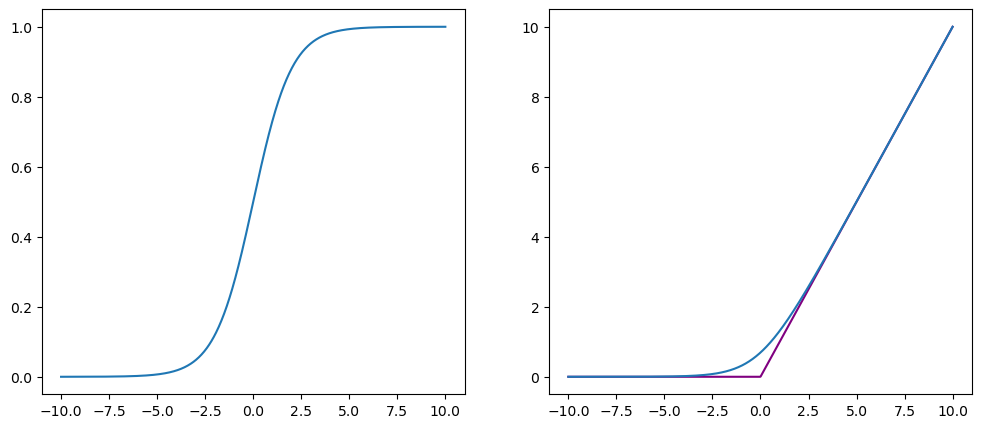

In [8]:
x = np.linspace(-10,10,1000)
sigma = (lambda xi: 1/(1+np.e**-xi))
zeta = (lambda xi: np.log(1+np.e**xi))

def xPlus(x):
    fx = []
    for xi in x:
        fx.append(max(0.0, xi))
    return fx

fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].plot(x, sigma(x))
axes[1].plot(x, xPlus(x), color="purple")
axes[1].plot(x, zeta(x))

## 3.11 Bayes' Rule

We want to know $P(\text{x}|\text{y})$ but we only know $P(\text{y}|\text{x})$ and $P(\text{x})$

\begin{equation}
    P(\text{x}|\text{y}) = \frac{P(\text{x}) P(\text{y}|\text{x})}{P(\text{y})}
\end{equation}

where $P(\text{y})$ can be computed with the chain rule of probabilities $P(\text{y}) = \sum_{\text{x}}P(\text{y}|\text{x})$

## 3.13 Information Theory

**Self-information**: satisfies all previous 3, for single outcome events $\text{x}=x$

\begin{equation}
    I(x) = -\log P(x)
\end{equation}

Generalize this with **Shannon entropy**

\begin{equation}
    H(\text{x}) = E_{\text{x}\sim P}[I(x)] = - E_{\text{x}\sim P} [\log P(x)]
\end{equation}

the Shannon entropy of a distribution is the expected amount of in an event from that distribution.